
11490434/11490434 [==============================] - 2s 0us/step


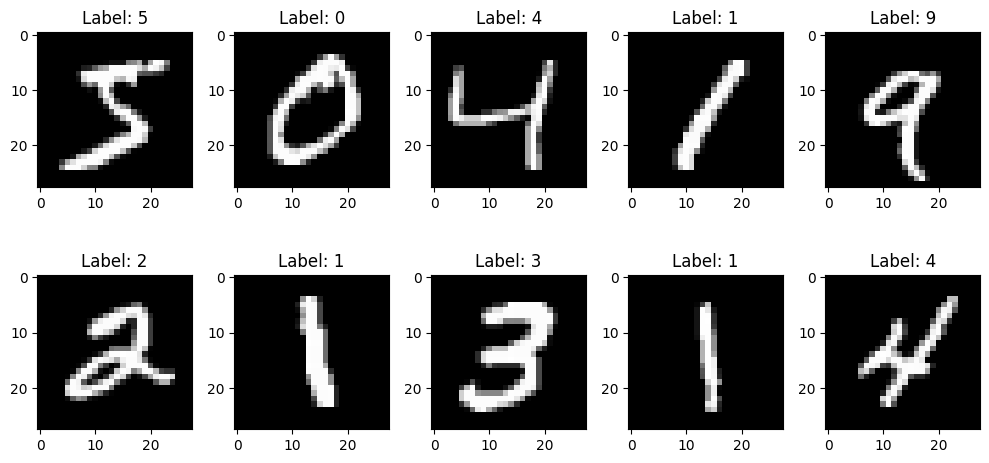

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Visualize a few sample images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

In [2]:
# Check the dimensions of the datasets
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


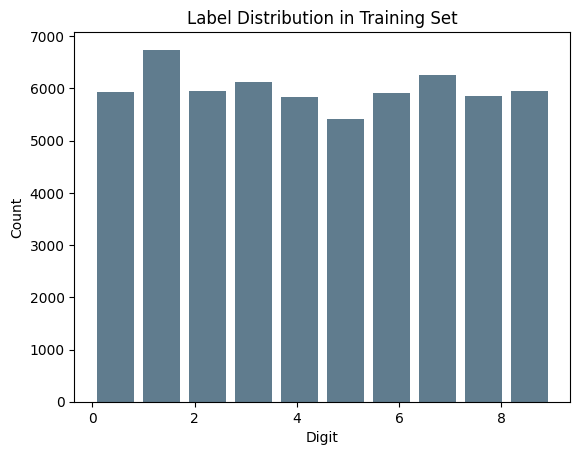

In [3]:
# Visualize the distribution of labels in the training set
plt.hist(y_train, bins=10, rwidth=0.8, color='#607c8e')
plt.title('Label Distribution in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

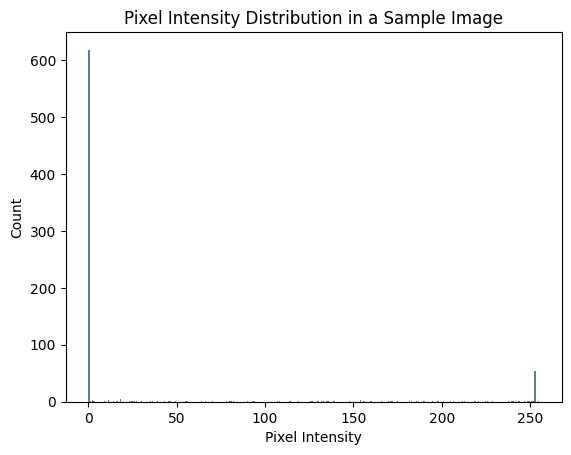

In [4]:
# Visualize the distribution of pixel intensities in a sample image
plt.hist(x_train[0].ravel(), bins=256, rwidth=0.8, color='#607c8e')
plt.title('Pixel Intensity Distribution in a Sample Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.show()

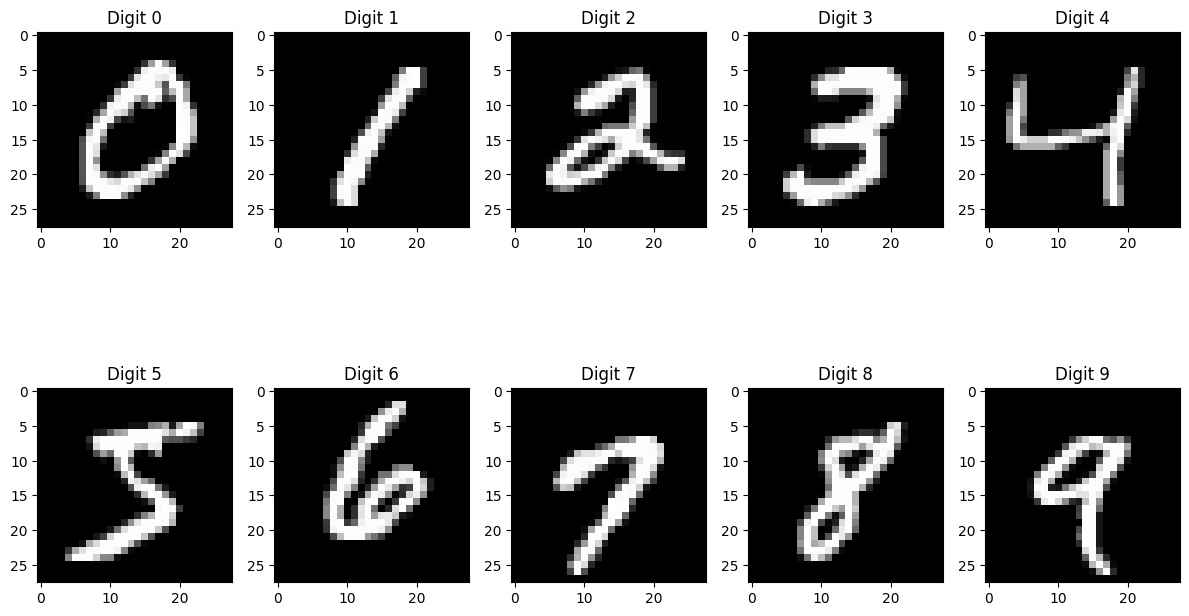

In [6]:
import numpy as np
# Display sample images for each digit
plt.figure(figsize=(12, 8))
for i in range(10):
    digit_indices = np.where(y_train == i)[0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[digit_indices[0]], cmap='gray')
    plt.title(f"Digit {i}")
plt.tight_layout()
plt.show()

In [7]:
# Check the data type and value range of pixel intensities
print("Data type:", x_train.dtype)
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))

Data type: uint8
Min pixel value: 0
Max pixel value: 255


In [8]:
from tensorflow.keras.utils import to_categorical

# Step 2: Data Preprocessing

# Reshape the input images to the required format (assuming channels last)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10


938/938 [==============================] - 21s 21ms/step - loss: 0.1907 - accuracy: 0.9403 - val_loss: 0.0578 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 23s 25ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0318 - val_accuracy: 0.9899
Epoch 4/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0388 - val_accuracy: 0.9871
Epoch 5/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0303 - val_accuracy: 0.9908
Epoch 6/10
938/938 [==============================] - 25s 27ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 7/10
938/938 [==============================] - 24s 25ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0395 - val_accurac

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9900
Test Accuracy: 99.00%
